### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [28]:
# Code starts here
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ss = pd.read_csv('sample_submission.csv')
# Code ends here.

In [29]:
train.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,8,155.8800,202,2469,4.7,1,4.9,9,4.7,7,0
1,26,19.9900,9,252,4.8,0,4.6,39,4.6,20,1
2,26,91.6980,56,659,4.6,0,4.6,34,3.9,4,2
3,11,24.3878,1,19,3.0,5,4.0,13,4.0,10,3
4,7,609.9878,84,4016,4.5,1,3.9,34,3.5,10,4


In [30]:
test.head()

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,26,8,941,4.6,0,4.6,33,4.3,16,9907
1,11,0,19,0.0,5,0.0,13,0.0,7,5243
2,29,34,1376,4.0,1,4.3,34,3.8,12,8276
3,26,0,369,0.0,5,0.0,28,0.0,9,6501
4,11,1,19,3.0,5,4.0,13,4.0,0,1619


In [31]:
test.head()

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,26,8,941,4.6,0,4.6,33,4.3,16,9907
1,11,0,19,0.0,5,0.0,13,0.0,7,5243
2,29,34,1376,4.0,1,4.3,34,3.8,12,8276
3,26,0,369,0.0,5,0.0,28,0.0,9,6501
4,11,1,19,3.0,5,4.0,13,4.0,0,1619


In [32]:
ID,TARGET  = 'Id' , 'list_price' 


In [33]:
print(f'Train data contains {train.shape[0]} and {train.shape[1]} Columns')
print(f'Test data contains {test.shape[0]} and {test.shape[1]} Columns')

features = [i for i in train.columns if i not in [ID,TARGET]]
print(f'features in data {len(features)} ')

Train data contains 8582 and 11 Columns
Test data contains 3679 and 10 Columns
features in data 9 


In [34]:
train.isnull().sum()

ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
review_difficulty    0
star_rating          0
theme_name           0
val_star_rating      0
country              0
Id                   0
dtype: int64

In [35]:
train.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
count,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000
mean,16.649149,64.493463,14.680727,486.677464,3.697809,1.994640,3.904649,20.482172,3.597448,10.045211,4290.500000
std,8.186261,89.871631,34.867561,802.789725,1.653742,1.792387,1.617678,11.948618,1.624698,6.191468,2477.554338
min,0.000000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,19.990000,1.000000,95.000000,3.600000,0.000000,4.000000,9.000000,3.500000,4.000000,2145.250000
50%,19.000000,36.587800,4.000000,214.000000,4.400000,2.000000,4.600000,21.000000,4.200000,10.000000,4290.500000
75%,23.000000,71.298000,12.000000,544.000000,4.700000,4.000000,4.900000,34.000000,4.700000,15.000000,6435.750000
max,30.000000,1104.870000,367.000000,7541.000000,5.000000,5.000000,5.000000,40.000000,5.000000,20.000000,8581.000000


### Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

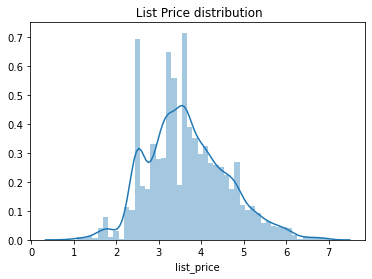

In [36]:
# Code starts here

sns.distplot(np.log(train[TARGET]))
_ = plt.title(f' List Price distribution')
_  = plt.show
# Code ends here.

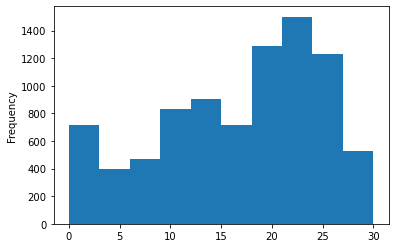

In [37]:
train['ages'].plot(kind='hist')


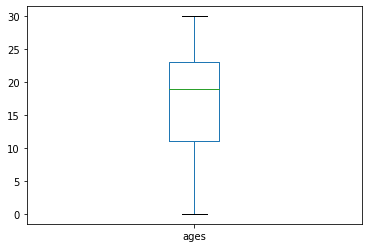

In [38]:
train['ages'].plot(kind='box')

_ = plt.show()


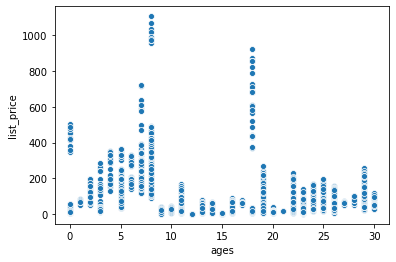

In [39]:
sns.scatterplot(x=train['ages'],y=train['list_price'])

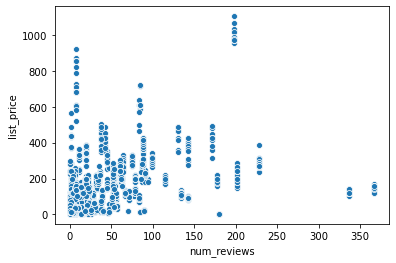

In [40]:
sns.scatterplot(x=train['num_reviews'],y=train['list_price'])

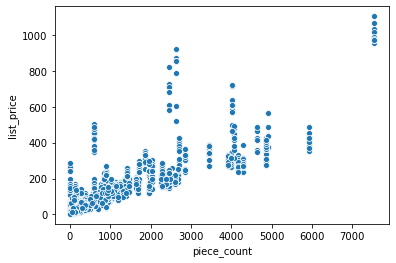

In [41]:
sns.scatterplot(x=train['piece_count'],y=train['list_price'])

### Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

In [42]:
train.drop(columns=ID,axis = 1,inplace =True)

In [43]:
train.corr()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
ages,1.000000,-0.076763,-0.160969,-0.090685,0.232847,-0.239683,0.102633,0.476178,0.116349,-0.001526
list_price,-0.076763,1.000000,0.439499,0.866119,0.145151,-0.284760,0.126577,0.192707,0.114612,0.018192
num_reviews,-0.160969,0.439499,1.000000,0.542924,0.151801,-0.196846,0.160762,0.012342,0.172431,0.001953
piece_count,-0.090685,0.866119,0.542924,1.000000,0.174411,-0.312239,0.180903,0.173318,0.192863,0.002506
play_star_rating,0.232847,0.145151,0.151801,0.174411,1.000000,-0.670508,0.902573,0.151078,0.921824,-0.000958
review_difficulty,-0.239683,-0.284760,-0.196846,-0.312239,-0.670508,1.000000,-0.637901,-0.153948,-0.650333,0.006417
star_rating,0.102633,0.126577,0.160762,0.180903,0.902573,-0.637901,1.000000,0.065264,0.908720,-0.003865
theme_name,0.476178,0.192707,0.012342,0.173318,0.151078,-0.153948,0.065264,1.000000,0.097430,-0.003625
val_star_rating,0.116349,0.114612,0.172431,0.192863,0.921824,-0.650333,0.908720,0.097430,1.000000,0.002413
country,-0.001526,0.018192,0.001953,0.002506,-0.000958,0.006417,-0.003865,-0.003625,0.002413,1.000000


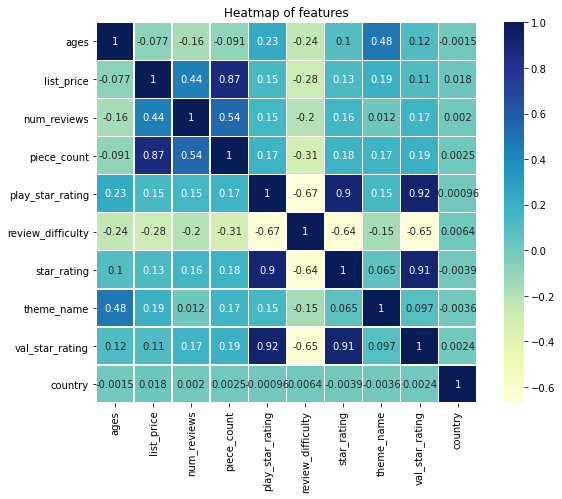

In [44]:
# Code starts here

_ = plt.figure(figsize=(10,7))
corr_ = train.corr()

sns.heatmap(corr_,linewidths=.5,square=True,cmap ="YlGnBu",annot=True)
plt.title('Heatmap of features')
plt.show()




# Code ends here.

We are looking the correlation between the features and we found that some features have multicollinearity
Therfore we are removing them

In [58]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [60]:
correlation(train,0.7)

{'piece_count', 'star_rating', 'val_star_rating'}

In [45]:
train.columns

Index(['ages', 'list_price', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country'],
      dtype='object')

In [46]:
y= train.loc[:,['list_price']]




In [62]:
X = train.loc[:,[ 'piece_count',
                 'theme_name',
                 'val_star_rating',
                 'review_difficulty',
                'star_rating' ,
                 'play_star_rating',
                  'num_reviews'
                 
 ]]
X2 = train.loc[:,['piece_count', 'star_rating', 'val_star_rating']]

### Model building

First Buliding the model with all features

In [ ]:
# Code starts here

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state = 0)



lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)



# Code ends here.

In [77]:
np.sqrt(mean_squared_error(y_test,y_pred,squared=True))

50.234953032364544

In [78]:
r2_score(y_test,y_pred)

0.7488834591326543

Building model features with 'piece_count', 'star_rating', 'val_star_rating'

In [63]:
X2_train, X2_test, y_train, y_test= train_test_split(X2,y,test_size=0.2,random_state = 0)



lr2 = LinearRegression()
lr2.fit(X2_train,y_train)

y_pred2 = lr2.predict(X2_test)


### Residual check!

- Check the distribution of the residual.

In [64]:
np.sqrt(mean_squared_error(y_test,y_pred2,squared=True))

51.457185037264495

In [65]:
r2_score(y_test,y_pred2)

0.7365153203597962

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [66]:
# Code starts here
test = test.loc[:,[ 'piece_count',

'theme_name',
                 'val_star_rating',
                 'review_difficulty',
                'star_rating' ,
                 'play_star_rating',
                  'num_reviews'
                 
 ]]


test2 = test.loc[:,['piece_count', 'star_rating', 'val_star_rating']]



# Code ends here.

In [51]:
ids = test['Id']

In [73]:
# Code starts here

def download_pred(preds_test,file_name ):
    ss[TARGET] = preds_test
    ss.to_csv(file_name,index = False)
    










# Code ends here.

In [80]:
test_preds = lr.predict(test)

In [67]:
test_preds2 = lr2.predict(test2)

In [55]:
new_dataf = pd.DataFrame()
new_dataf['id'] = ids
new_dataf['list_price'] = test_preds


In [68]:
new_dataf2 = pd.DataFrame()
new_dataf2['id'] = ids
new_dataf2['list_price'] = test_preds2


In [70]:
new_dataf2.to_csv('submission_4_linear_regression.csv',index=True)

In [81]:
download_pred(preds_test=test_preds,file_name='Linear_regression_with all features.csv')

In [76]:
download_pred(preds_test=test_preds2,file_name='Linear_regression_submission.csv')